In [22]:
import os
import easyocr
import cv2
import matplotlib.pyplot as plt
import random
import re

In [2]:
print(cv2.__version__)
print(easyocr.__version__)

4.8.1
1.6.2


In [4]:
def get_image(img_path: str):
    return cv2.imread(img_path)
    

def preprocess(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

def show_img(img):
    plt.subplot(2, 1, 1)
    plt.imshow(img)
    plt.title('original')
        
    processed_img= preprocess(img)
    plt.subplot(2, 1, 2)
    plt.imshow(processed_img, cmap='gray')
    plt.title('processed')

    plt.show()  
    return processed_img

In [5]:
# dir is a test set of plate numbers
dir= r'/home/iruhdeg7/Documents/imagine partners/plaque/License_Plates_of_Algeria_Dataset/recognition/test'

test_imgs_path= os.listdir(dir)

In [6]:
test_imgs= [get_image(f'{dir}/{im_path}') for im_path in test_imgs_path]
L= len(test_imgs)

In [18]:
img= test_imgs[random.randint(0, L)]

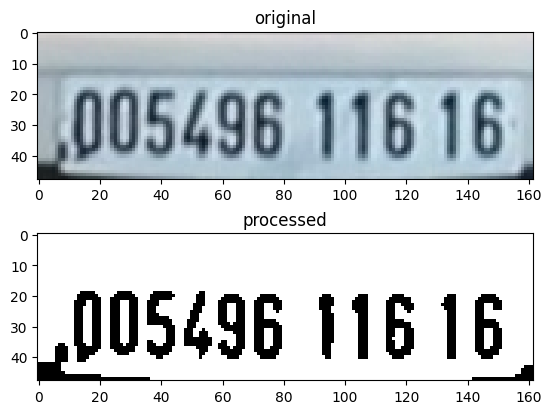

In [19]:
processed_img= show_img(img)

In [20]:
# initializinf the reader
reader = easyocr.Reader(['en'])
result = reader.readtext(img, allowlist='1234567890')[0][1]
print(result)
processed_result= reader.readtext(processed_img, allowlist='1234567890')[0][1]
print(processed_result)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


00549611616
00549661616


In [21]:
plate_numbers= [text.split('.')[0] for text in test_imgs_path]
plate_numbers[:10]

['0573631034',
 '0520711018',
 '0480110143',
 '00004741816',
 '0041511618',
 '0584110343',
 '09686511516',
 '3025410416',
 '0567811825',
 '0054230125']

In [43]:
def is_new_car(plate_number: str):
    if re.match(r'\d*00\d{2}', plate_number):
        return True
    return False

In [45]:
def format_plate_number(plate_number):
    plate_number= re.sub(r'\D', '', plate_number)
    wilaya= plate_number[-2:]
    type_year= plate_number[-5:-2]
    serial_number= plate_number[:-5]
    if is_new_car(plate_number):
        type_year= '00'
    
    return f'{serial_number} {type_year} {wilaya}'

In [46]:
re.sub(r'\D', '', '12 34.86 A4')

'1234864'

In [50]:
format_plate_number(plate_numbers[170])


'05294 193 06'